# Digit recognizer
###Description
The goal is to create a supervised neural network that recognizes handwritten text (numbers) and returns the most probable result.

## 1. Problem definition
Basing on the large set of input data together with the answers, we need to train the neuron network in such a way that it can recognize other data and return the most probable result.

The input data consists of csv files that have 785 columns of:
* 1 a column with the result that is an int value 0-9
* 784 columns with int values 0-255 

The columns with values are actually a 28/28 matrix that can be thought of as a pixel matrix, where the numbers represent a shade of gray. After appropriate coloring, we should get a picture with a number.


## 2. Importing required libraries
### Biblioteki użyte w kodzie


|Library|Short description|
|--|--|
|numpy|makes complex math operations simple|
|pandas|allows you to manage CSV data in a very easy and intuitive way|
|tensorflow: keras|library needed to create a neural network.|
|matplotlib.pyplot|library that is used while displaying data in a chart|
|collections: defaultdict|a dictionary that is not rising errors while trying to extract data using a key that is missing|
|warnings|we do not want to display warnings that something is deprecated in libraries, etc.|

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

## 3. Reading train data
### Reading train csv file with use of pandas

This step consists of:
 * creating a variable with location of training csv file
 * reading file with use of pandas, and values would be treated as int
 * viewing first 10 rows to illustrate what we are facing with 

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/gdrive


In [11]:
train_filepath='/content/drive/MyDrive/csv/train.csv'
train_file=pd.read_csv(train_filepath, dtype=int)
train_file.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4. Preparing train results

The train result is located in the first column of the file. The column is named ```label``` .

This step consists of:
* with use of the pandas we take data from the 'label' column, and we converts it into numpy array. Result is set into Y_train  variable.
* we are viewing shape and peeking the data that we've loaded.

In [12]:
Y_train=train_file['label'].to_numpy()
print('* shape: %s\n* data peek:%s'%(Y_train.shape,Y_train))

* shape: (42000,)
* data peek:[1 0 1 ... 7 6 9]


## 5. Preparing train data

The train data is located after the first column of the file, so we need to read rest of columns, and adapt them to our needs.

This step consists of:
* create an empty list called X_train
* with use of the pandas we take data from the columns after 'label', and we converts it into numpy array.
* we are iterating through train_data lines, and for each line array is reshaped to the matrix of shape (28,28), result is appended to X_train
* print shape and length of X_train list

In [13]:
X_train=[]

train_data=train_file[train_file.columns[1:]].to_numpy()

for train_line in train_data:
    X_train.append(train_line.reshape(28,28))
X_train = np.expand_dims(X_train, axis=3)
print("* shape: %s, \n* The length of train data: %d"%(X_train.shape,len(X_train)))

* shape: (42000, 28, 28, 1), 
* The length of train data: 42000


## 6. Checking if train data is sorted
Before illustrating data on plot it would be great to check if train data is sorted in the way: [0, 1, 2, ... 9,0,1, ...9,...]

This step consists of:
* looping the Y_train array
* check if the result of subtraction between the counter and result number, after apply modulo 10 would return 0
* if yes then continue, if not then return False

In [14]:
ordered = True
for i in range(len(Y_train)):
    number=Y_train[i]
    if i-number<0 or ((i-number)%10!=0):
        ordered=False
        break

print("Is train input data ordered: %r"%(ordered))

Is train input data ordered: False


## 7. Illustrating train data and results on plots (1 METODA)
In this step we would illustrate the train data and results on plots. The tricky thing is that data is not sorted as we want, so we need to collect only the certain amount of data for each label.

This step consists of:
* prepare sublots objects that would contain 100 subplots with data and results
* prepare variables:
    * enough_data_count - max count of data for each train result label (10 because we have 0-9 numbers)
    * num_counter - variable that would contain information how many data we have for our plots, it is needed to have 10 positions for each train result label
* prepare helper methods:
    * view_on_plot - method that would present data on concrete subplot
    * skip_when_data_full - it'll check if for given label we have enough data
    * is_all_needed_data - it'll check if num_counter contains enough data for each train result label
* looping through Y_train data:
    * loading label,img from current line
    * checking if we have all data needed - if we all collect the needed data then break loop
    * view result on plots
    * increment value for num_counter

1 METODA

In [ ]:
f, axes = plt.subplots(10, 10, figsize=(16, 18))

enough_data_count=10
num_counter = defaultdict(int)

def view_on_plot(x,y,data):
    val=axes[x, y]
    val.imshow(data)
    val.set_title(y)

def skip_when_data_full(label):
    return num_counter[label] >= enough_data_count

def is_all_needed_data():
    if len(num_counter.values())!=enough_data_count:
        return False
    for data_count in num_counter.values():
        if data_count<enough_data_count:
            return False
    return True

for i in range(len(Y_train)):
    label,img = Y_train[i],X_train[i]
    if skip_when_data_full(label):
        if is_all_needed_data():
            break
        else:
            continue
    view_on_plot(num_counter[label],label,img)
    num_counter[label] += 1
    
        
[ax.set_axis_off() for ax in axes.ravel()]
plt.show()

2. METODA

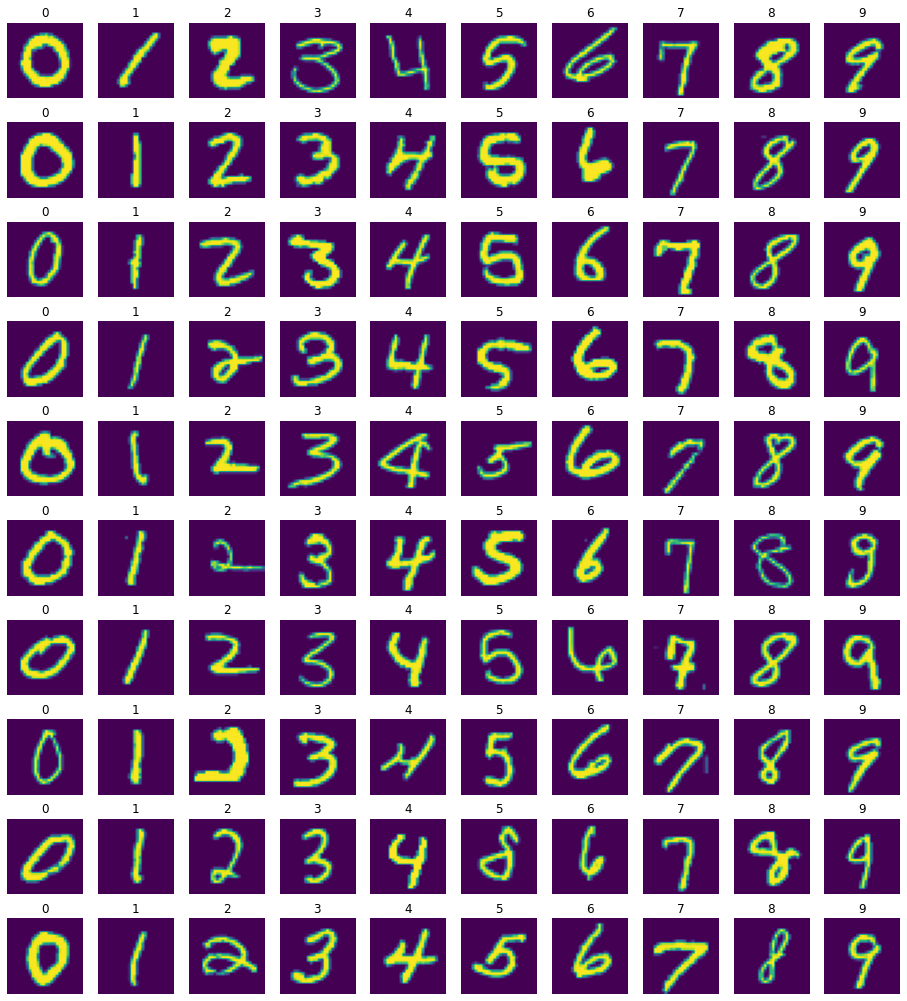

In [31]:
f, axes = plt.subplots(10, 10, figsize=(16, 18))

counter = defaultdict(int)

for i in range(1000):
    label = int(Y_train[i])
    if counter[label] >= 10: continue
    img = X_train[i].reshape((28,28))
    axes[counter[label], label].imshow(img)
    axes[counter[label], label].set_title(label)
    counter[label] += 1
        
[ax.set_axis_off() for ax in axes.ravel()]
plt.show()

## 8. Data analysing
In this code we would not be coding, but analysing previously created plot.

This analysis would help us later with choosing correct options while dataset creation.

As we can see this image contains numbers which:
* are not flipped horizontally and vertically
* are not rotated, sheared, zoomed, shrinked
* are not shifted on height, width
* sometimes are ugly written, but looks rather normal.

## 9. ImageDataGenerator - dataset prepair
In this step we would use object ImageDataGenerator from terraflow keras library, to create train and validation data.

Basing on previous analysis we will not use any data modification options.

This step consists of:

* creation of object ImageDataGenerator:
    * determination of a validation sample 10%
    * rescale data to build image classification model using very little data [Source1](https://github.com/Arsey/keras-transfer-learning-for-oxford102/issues/1)
[Source2](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
* creating a training set: train_set
* creating a validation set: validation_set



In [30]:
train_data_generator = keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.1,
    rescale=1./255
)

train_set = train_data_generator.flow(
    X_train, Y_train,
    batch_size=128,
    subset="training"
)

validation_set = train_data_generator.flow(
    X_train, Y_train,
    batch_size=128,
    subset="validation"
)


## 10. Model creation
We are using once again keras, but this time for creating model.

We will use keras Sequential API because of its ease of use. It allows to create the model layer-by-layer like a linear stack of layers.

This step consists of:
* create Sequential object with use of following layers:
    * Conv2D: This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. [source](https://keras.io/api/layers/convolution_layers/convolution2d/)
    * MaxPooling2D: Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis.[source](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
    * BatchNormalization: Layer that normalizes its inputs. Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1. [source](https://keras.io/api/layers/normalization_layers/batch_normalization/)
    * Flatten: Flattens the input. Does not affect the batch size. [source](https://keras.io/api/layers/reshaping_layers/flatten/)
    * Dense: Just your regular densely-connected NN layer. Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). [source](https://keras.io/api/layers/core_layers/dense/)


In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

## 10. Model compilation and training
This step would compile the model and train it.

This step consists of:
* compile model with extra options:
    * add 'adam' optimizer (function to optimize the result)
    * add 'sparse_categorical_crossentropy' loss  (a function that aims to minimize losses)
    * add 'accuracy' metrics  (function used to evaluate performance)

* set the summary to be printed on the screen
* start training the neural network and save the result to the history variable
    * apply previously created sets
    * apply 10 epochs for learning

In [27]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
epochs=10
history = model.fit_generator(
    train_set,
    epochs=epochs,
    validation_data=validation_set
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          1

## 11. Displaying the learning progress in the form of graphs
This step would view learning progress of previously created model in form of graphs.

The graph would be viewed as: range of epoch and value of accuracy/loss.

Where:
* metrics[accuracy] 
* loss[sparse_categorical_crossentropy] 

This step consists of:
* view plot for training and validation accuracy
* view plot for training and validation loss

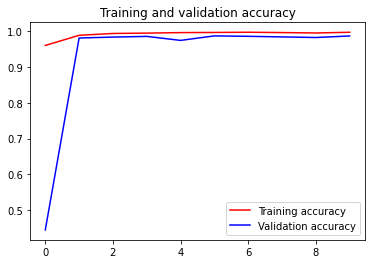

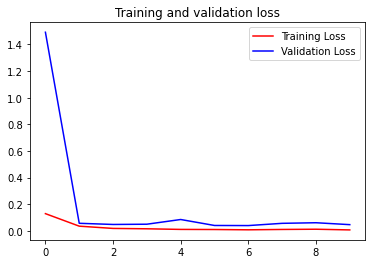

In [32]:
epochs_range = range(epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs_range, acc, 'r', label='Training accuracy')
plt.plot(epochs_range, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 11. Load file for testing
This step is loading new file for validating model. This time file is not containing results.

This step consists of:
* reading whole file test csv file with use of pandas to numpy int array
* each line of file is converted to matrix of shape (28,28)
* expanding dimensions to make matrix shape look like (28,28,1)

In [33]:

test_filepath='/content/drive/MyDrive/csv/test.csv'
X_test=[]
test_data=pd.read_csv(test_filepath, dtype=int).to_numpy()


for test_line in test_data:
    X_test.append(test_line.reshape(28,28))
X_test = np.expand_dims(X_test, axis=3)
print("* shape: %s, \n* The length of test data: %d"%(X_test.shape,len(X_test)))

* shape: (28000, 28, 28, 1), 
* The length of test data: 28000


## 12. Applying test data to model to predict values
Apply test data and get predictions

This step consists of:
* applying test data to model

In [34]:
predictions = model.predict(X_test)
predictions

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## 13. Prepare submission DataFrame

This step consists of:
* get max values of predictions, to match values [0-9]
* prepare submission DataFrame
* export to csv file

In [35]:
y_pred = np.argmax(predictions, axis=-1)

submission_df = pd.DataFrame(data={
    'ImageId': np.arange(1, X_test.shape[0] + 1),
    'label': y_pred
})
submission_df.to_csv('submission.csv', index=False)
submission_df

,ImageId,label
0,1,2
1,2,0
2,3,8
3,4,9
4,5,8
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## 14. View part of test data in plot (1 METODA)
This step is similar to one from the past, but this time we don't have to get ordered values.

This step consists of:
* create subplots (10,10)
* view value on plots where
    * x is value of modulo of 10 from incremented value i
    * y is value of floor division of 10 from incremented value i


1 METODA

In [ ]:
f, axes = plt.subplots(10, 10, figsize=(16, 18))

for i in range(100):
    label,img = int(y_pred[i]),X_test[i]
    view_on_plot(i % 10, i // 10,img)
        
[ax.set_axis_off() for ax in axes.ravel()]
plt.show()

2 METODA

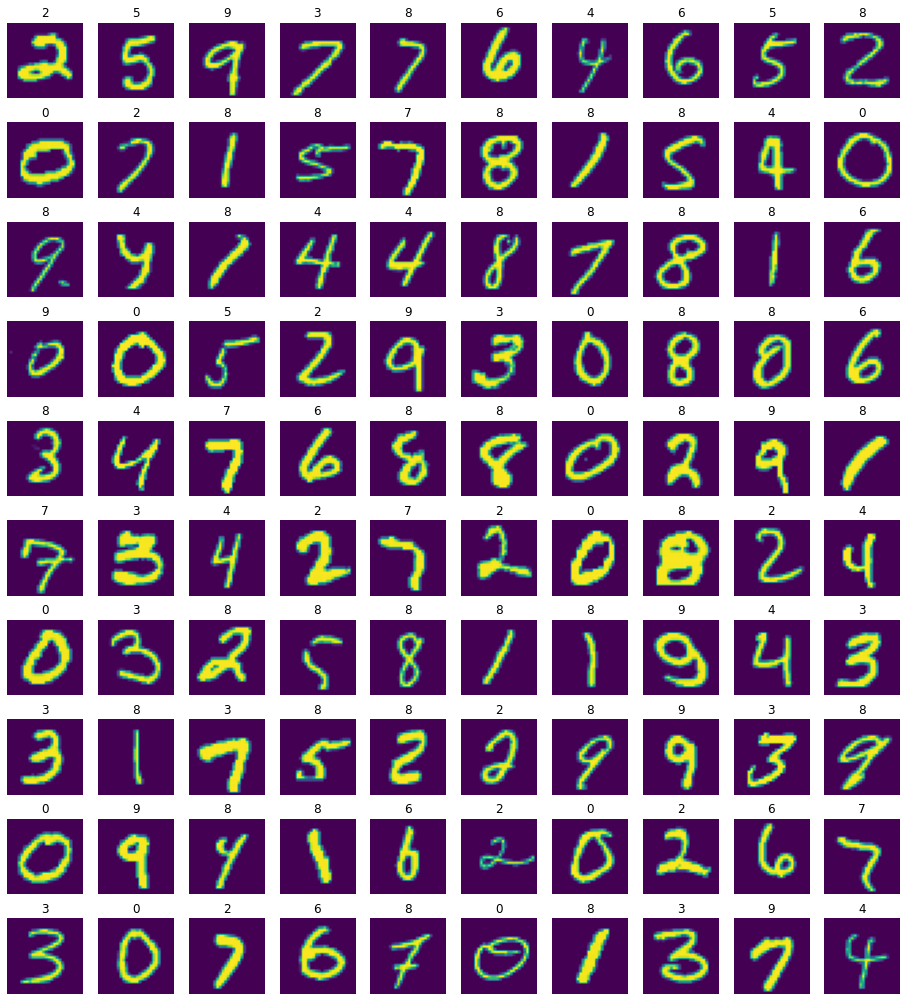

In [37]:
f, axes = plt.subplots(10, 10, figsize=(16, 18))

for i in range(100):
    label = int(y_pred[i])
    img = X_test[i].reshape((28,28))
    axes[i % 10, i // 10].imshow(img)
    axes[i % 10, i // 10].set_title(label)
    counter[label] += 1
        
[ax.set_axis_off() for ax in axes.ravel()]
plt.show()